In [42]:
PARENT_DIR = '../../'
SRC_DIR = '../../src'
DATA_DIR = '/lv_scratch/scratch/graffc0/fire_prediction/data'
EXP_DIR = '/lv_scratch/scratch/graffc0/fire_prediction/experiments'

FIGURES_DIR = '../../reports/figures/final_figures'
SAVE_FIGS = True

import numpy as np
import os
import sys
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load project packages
src_path = os.path.abspath(os.path.join(PARENT_DIR))
if src_path not in sys.path:
    sys.path.append(src_path)
    
src_path = os.path.abspath(os.path.join(SRC_DIR))
if src_path not in sys.path:
    sys.path.append(src_path)
    
from pipeline import train_pipeline
from helper import date_util as du
from helper.multidata_wrapper import MultidataWrapper

from matplotlib import gridspec
import xarray as xr
from tabulate import tabulate
import seaborn as sb


from visualization import mapping as vmap
from helper.geometry import get_default_bounding_box
import helper.loaders as load

from helper.date_util import filter_fire_season

import itertools

In [2]:
# === Use Seaborn Style ===
import seaborn as sb

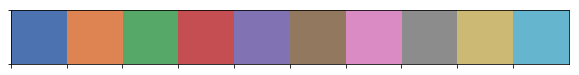

In [3]:
sb.palplot(sb.color_palette("deep", 10))

In [4]:
def set_font(fig_size=(32,10), font_size=14, font_scale=1.6):    
    sb.set(font_scale=font_scale)
    sb.set_style("white")
    sb.set_style("ticks")
    
    plt.rcParams['figure.figsize'] = fig_size
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams["legend.framealpha"] = 0

    font = {'family' : 'STIXGeneral',
            'weight' : 'normal',
            'size'   : font_size}

    plt.rc('font', **font)

In [993]:
%%capture
with open(os.path.join(EXP_DIR, '45983504184501058831726536101435861586.pkl'), 'rb') as fin:
    hurdle_p_1 = pickle.load(fin)

In [995]:
%%capture
with open(os.path.join(EXP_DIR, '93109780528348506866539675770485989218.pkl'), 'rb') as fin:
    hurdle_p_no_ar = pickle.load(fin)

In [478]:
%%capture
with open(os.path.join(EXP_DIR, '114592183252197240535937245185305031374.pkl'), 'rb') as fin:
    persist = pickle.load(fin)

In [1083]:
%%capture
with open(os.path.join(EXP_DIR, '87885957573506226607873308135084406376.pkl'), 'rb') as fin:
    hurdle_p_no_exp = pickle.load(fin)

In [1086]:
%%capture
with open(os.path.join(EXP_DIR, '83023209688853477266379908347919395750.pkl'), 'rb') as fin:
    hurdle_p_param_exp = pickle.load(fin)

In [983]:
%%capture
with open(os.path.join(EXP_DIR, '39846252414900884118493559703764894949.pkl'), 'rb') as fin:
    hurdle_p_res_pred = pickle.load(fin)

In [1404]:
%%capture
with open(os.path.join(EXP_DIR, '45115542706824376499963661202039279920.pkl'), 'rb') as fin:
    hurdle_p_neighbors = pickle.load(fin)

In [1535]:
modis_src = '/extra/graffc0/fire_prediction/data/interim/modis/aggregated/mcd14ml_006_200701_201612.pkl'

In [1536]:
%%capture
with open(modis_src, 'rb') as fin:
    modis_det = pickle.load(fin)

In [1537]:
modis_det[:20]

datetime_utc sat     lat      lon    T21    T31  sample    FRP  \
0  2007-01-01 00:25:00   T  -9.682  149.610  318.2  294.9     671    8.5   
1  2007-01-01 00:25:00   T  -9.515  147.058  312.1  295.4     410    9.5   
2  2007-01-01 00:26:00   T -13.986  142.478  321.3  291.8     166   25.0   
3  2007-01-01 00:26:00   T -14.051  142.407  315.6  288.6     163   10.5   
4  2007-01-01 00:26:00   T -14.257  142.683  318.6  289.2     180   12.7   
5  2007-01-01 00:26:00   T -14.260  142.701  323.0  290.7     181   26.3   
6  2007-01-01 00:27:00   T -15.476  144.215  322.2  291.3     294   10.8   
7  2007-01-01 00:27:00   T -15.543  144.218  325.9  297.3     295   12.8   
8  2007-01-01 00:27:00   T -15.560  144.187  342.4  295.9     293   57.5   
9  2007-01-01 00:27:00   T -15.584  144.333  328.3  297.1     304   14.1   
10 2007-01-01 00:27:00   T -15.563  144.180  325.1  294.5     293   15.5   
11 2007-01-01 00:27:00   T -15.596  144.311  331.0  298.7     303   18.8   
12 2007-01-01 00:27:00   T -15.598  144.324  336.5  298.5     304   31.6   
13 2007-01-01 00:27:00   T -15.606  144.309  334.1  299.4     303   27.9   
14 2007-01-01 00:27:00   T -16.053  141.446  324.8  294.8     142   25.6   
15 2007-01-01 00:27:00   T -16.057  141.466  366.6  297.8     143  297.3   
16 2007-01-01 00:27:00   T -16.061  141.487  327.4  295.6     144   36.5   
17 2007-01-01 00:27:00   T -16.070  141.464  371.7  296.6     143  346.3   
18 2007-01-01 00:27:00   T -16.074  141.485  327.4  296.0     144   34.6   
19 2007-01-01 00:27:00   T -16.103  141.500  321.8  295.6     145   19.5   

    conf  type  
0     28     0  
1     53     3  
2     59     0  
3     40     0  
4     39     0  
5     52     0  
6     49     0  
7     37     0  
8     90     0  
9     75     0  
10    23     0  
11    79     0  
12    84     0  
13    82     0  
14     0     0  
15    94     0  
16    70     0  
17    87     0  
18    60     0  
19    45     0

In [1549]:
from src.pipeline.pipeline_params import REGION_BOUNDING_BOXES
from src.helper.geometry import filter_bounding_box_df
from src.helper.geometry import LatLonBoundingBox

In [1553]:
REGION_BOUNDING_BOXES
REGION_BOUNDING_BOXES['alaska'].get()

(55.0, 71.0, -165.0, -138.0)

In [1564]:
more_alaska = LatLonBoundingBox(51.21, 71.36, -172, -138)

In [1545]:
alaska_in = filter_bounding_box_df(modis_det, REGION_BOUNDING_BOXES['alaska'])

In [1566]:
alaska_all = filter_bounding_box_df(modis_det, more_alaska)

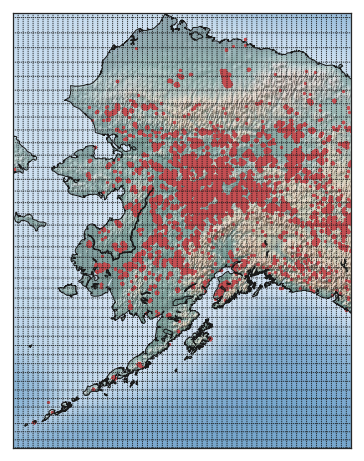

In [1572]:
set_font((FIG_REG_WIDTH*2,FIG_REG_WIDTH*2/FIG_REG_ASPECT_RATIO))
mp = vmap.make_map(more_alaska, (0, .5, 0, .5))
mp.shadedrelief()
_ = mp.scatter(list(alaska_all.lon), list(alaska_all.lat), 5, latlon=True, marker='o', color='r')

In [1569]:
alaska_in.size / alaska_all.size

0.99955331172608664

In [1129]:
y = hurdle_p_1['residuals_te'][0][0]
y_pred = hurdle_p_1['residuals_te'][0][1]
residuals = y_pred-y

In [1130]:
y = hurdle_p_res_pred['residuals_te'][0][0]
y_pred = hurdle_p_res_pred['residuals_te'][0][1]
residuals_res_pred = y_pred-y

In [1131]:
y = hurdle_p_no_ar['residuals_te'][0][0]
y_pred = hurdle_p_no_ar['residuals_te'][0][1]
residuals_no_ar = y_pred-y

In [1405]:
y = hurdle_p_neighbors['residuals_te'][0][0]
y_pred = hurdle_p_neighbors['residuals_te'][0][1]
residuals_neighbors = y_pred-y

In [1132]:
y = persist['residuals_te'][0][0]
y_pred = persist['residuals_te'][0][1]
residuals_persist = y_pred-y

In [1133]:
y = hurdle_p_param_exp['residuals_te'][0][0]
y_pred = hurdle_p_param_exp['residuals_te'][0][1]
residuals_param_exp = y_pred-y

In [1134]:
y = hurdle_p_no_exp['residuals_te'][0][0]
y_pred = hurdle_p_no_exp['residuals_te'][0][1]
residuals_no_exp = y_pred-y

In [1135]:
active = y != 0
fire_day = y_pred != 0
active_shift = np.concatenate([np.zeros((33,55,1)), active[:,:, :-1]], axis=2)

In [130]:
def get_neighbors(p, kernel_size, exclude_p=True, shape=None):

    ndim = len(p)

    # generate an (m, ndims) array containing all strings over the alphabet {0, 1, 2}:
    offset_idx = np.indices((kernel_size,) * ndim).reshape(ndim, -1).T

    # use these to index into np.array([-1, 0, 1]) to get offsets
    offsets = np.r_[np.arange(kernel_size)-(kernel_size//2)].take(offset_idx)

    # optional: exclude offsets of 0, 0, ..., 0 (i.e. p itself)
    if exclude_p:
        offsets = offsets[np.any(offsets, 1)]

    neighbours = p + offsets    # apply offsets to p

    # optional: exclude out-of-bounds indices
    if shape is not None:
        valid = np.all((neighbours < np.array(shape)) & (neighbours >= 0), axis=1)
        neighbours = neighbours[valid]

    return neighbours

In [782]:
def morans(y, neighborhood_size):
    num_points = y.size
    
    if np.all(y == y[0,0]):
        return 1
    
    mean = np.nanmean(y)
    y_zero = y - mean
    
    
    total = 0
    total_weight = 0
    
    for p in itertools.product(range(y.shape[0]), range(y.shape[1])):
        val = y_zero[p]
        
        if np.isnan(val):
            continue
        
        if neighborhood_size:
            neighbor_inds = get_neighbors(p, neighborhood_size, shape=y_zero.shape)
            neighbors = y_zero[tuple(neighbor_inds.T)]
            
            neighbors = np.array([n for n in neighbors if not np.isnan(n)])
        else:
            neighbors = y_zero.flatten()
            
        
        total += np.sum(val * neighbors)
        total_weight += len(neighbors)  
    
    denom = np.nansum(y_zero**2)
        
    return (num_points / total_weight) * (total / denom)

In [285]:
def morans_3d(y, neighborhood_size):
    num_points = y.size
    
    if np.all(y == y[0,0,0]):
        return 1
    
    mean = np.mean(y)
    y_zero = y - mean
    
    total = 0
    total_weight = 0
    
    for i in range(y.shape[0]):
        for p in itertools.product(range(y.shape[1]), range(y.shape[2])):
            val = y_zero[i][p]

            if neighborhood_size:
                neighbor_inds = get_neighbors(p, neighborhood_size, shape=y_zero[0].shape)
                neighbors = y_zero[i][tuple(neighbor_inds.T)]
            else:
                neighbors = y_zero.flatten()

            total += np.sum(val * neighbors)
            total_weight += len(neighbors)  
    
    denom = np.sum(y_zero**2)
        
    return (num_points / total_weight) * (total / denom)

In [373]:
def morans_3d_active(y, neighborhood_size):
    
    mean_total = 0
    num_points = 0
    
    for i in range(y.shape[0]):
        for p in itertools.product(range(y.shape[1]), range(y.shape[2])):
            val = y[i][p]
            
            if val == 0:
                continue
            
            neighbor_inds = get_neighbors(p, neighborhood_size, shape=y[0].shape, exclude_p=False)
            neighbors = y[i][tuple(neighbor_inds.T)]
            
            mean_total += np.sum(neighbors)
            num_points += 1
    
    
    mean = mean_total/num_points
    y_zero = y - mean
    
    total = 0
    total_weight = 0
    
    for i in range(y.shape[0]):
        for p in itertools.product(range(y.shape[1]), range(y.shape[2])):
            if y[i][p] == 0:
                continue
                
            val = y_zero[i][p]            

            if neighborhood_size:
                neighbor_inds = get_neighbors(p, neighborhood_size, shape=y_zero[0].shape)
                neighbors = y_zero[i][tuple(neighbor_inds.T)]
            else:
                neighbors = y_zero.flatten()

            total += np.sum(val * neighbors)
            total_weight += len(neighbors)  
    
    denom = np.sum(y_zero**2)
        
    return (num_points / total_weight) * (total / denom)

In [436]:
def temp_correl(x):
    x_1 = x[0:-1]
    x_2 = x[1:]
    
    if np.all(x[0] == x) or np.all(x_1 == x_2) or np.all(x_1[0] == x_1) or np.all(x_2[0] == x_2):
        return 1
    
    x_1_zero = x_1 - np.mean(x)
    x_2_zero = x_2 - np.mean(x)
    
    total = np.sum(x_1_zero*x_2_zero)
    denom = ((len(x) - 1) / len(x)) * np.sum( (x - np.mean(x))**2 )
    
    return total / denom
    

In [507]:
def extract(x):
    x = np.copy(x)
    x_0 = np.concatenate([[0], x[:-1]])
    x[x_0==0] = 0
    x = x[x!=0]
    
    return x

def temp_correl_active(X, lag=1):    
    xs = []
    for p in itertools.product(range(X.shape[1]), range(X.shape[2])):
        x = extract(X[:,p[0],p[1]])
        if x.size != 0:
            xs.append(x)
        
    x = np.concatenate(xs)
    
    x_1 = x[0:-lag]
    x_2 = x[lag:]
    
    if np.all(x[0] == x) or np.all(x_1 == x_2) or np.all(x_1[0] == x_1) or np.all(x_2[0] == x_2):
        return 1
    
    x_1_zero = x_1 - np.mean(x)
    x_2_zero = x_2 - np.mean(x)
    
    total = np.sum(x_1_zero*x_2_zero)
    denom = ((len(x) - 1) / len(x)) * np.sum( (x - np.mean(x))**2 )
    
    if total / denom < 0:
        print(x)
    
    return total / denom

def correlgram(X, title=None, lags=5):
    ys = []
    for lag in range(lags):
        ys.append(temp_correl_active(X, lag+1))
        
    plt.plot(np.arange(1,lags+1), ys, label=title)
    

In [267]:
morans_non_zero_vals = [morans(non_zero_days[i], 3) for i in range(non_zero_days.shape[0])]

In [270]:
morans_non_zero = np.mean(morans_non_zero_vals)
morans_non_zero

0.039735213550043162

In [435]:
morans_all_vals = [morans(residuals_r[i], 3) for i in range(residuals_r.shape[0])]

IndexError: index 33 is out of bounds for axis 0 with size 33

In [ ]:
morans_all = np.mean(morans_all_vals)
morans_all

In [415]:
morans_all_vals_persist = [morans(residuals_persist_r[i], 3) for i in range(residuals_persist_r.shape[0])]

In [416]:
morans_all_persist = np.mean(morans_all_vals_persist)
morans_all_persist

0.27616173407420824

In [288]:
morans_non_zero_3d = morans_3d(non_zero_days, 3)
morans_non_zero_3d

0.13833146067121488

In [349]:
morans_non_zero_3d_persist = morans_3d(non_zero_days_persist, 3)
morans_non_zero_3d_persist

0.18773005799265838

In [289]:
morans_all_3d = morans_3d(residuals_r, 3)
morans_all_3d

0.15596408030229852

In [ ]:
morans_all_3d = morans_3d(residuals_persist_r, 3)
morans_all_3d

In [374]:
morans_non_zero_3d_active = morans_3d_active(non_zero_days, 3)
morans_non_zero_3d_active

0.0092972782697124355

In [375]:
morans_non_zero_3d_active_persist = morans_3d_active(non_zero_days_persist, 3)
morans_non_zero_3d_active_persist

0.034741078661849743

In [463]:
morans_non_zero_y_3d_active = morans_3d_active(non_zero_days_y, 3)
morans_non_zero_y_3d_active

0.0026084109505948821

In [276]:
null_hyp_correlation = -1 / (residuals[0].size - 1)
null_hyp_correlation

-1.652919882973272e-05

In [490]:
temp_correl_active(residuals_r, lag=1)

0.33246349550678711

In [1146]:
FIG_REG_WIDTH = 7
FIG_REG_ASPECT_RATIO = 1.75

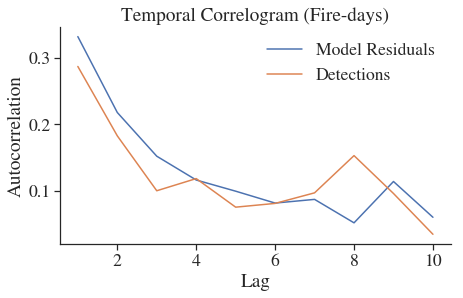

In [564]:
set_font((FIG_REG_WIDTH,FIG_REG_WIDTH/FIG_REG_ASPECT_RATIO))
correlgram(residuals_r, 'Model Residuals', 10)
correlgram(y, 'Detections', 10)
plt.title('Temporal Correlogram (Fire-days)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
sb.despine()
plt.legend()
plt.savefig('temp_correl.pdf')

In [563]:
np.mean(residuals[fire_day==1])

-0.016009879009028831

In [628]:
def extract_model_residuals_pos(x, active):
    xs = []
    current = []
    for i in range(1, len(x)):
        if active[i]:
            current.append(x[i])
        elif len(current) > 0:
            xs.append(current)
            current = []
            
    return xs

def extract_model_residuals(X, active):
    xs_all_pos = []
    for p in itertools.product(range(X.shape[0]), range(X.shape[1])):
        xs = extract_model_residuals_pos(X[p[0],p[1]], active[p[0],p[1]])
        xs_all_pos += xs
        
    return xs_all_pos

In [1064]:
def correl(pairs):
    pairs_zero_0 = pairs[:,0] - np.mean(pairs[:,0])
    pairs_zero_1 = pairs[:,1] - np.mean(pairs[:,1])
       
    numerator = np.nansum(pairs_zero_0 * pairs_zero_1)
    denominator = np.sqrt(np.nansum(pairs_zero_0**2) * np.nansum(pairs_zero_1**2))
    
    return numerator / denominator

In [750]:
def create_pairs(x, lag):
    pairs = []
    for i in range(len(x)-lag):
        pairs.append((x[i], x[i+lag]))
    
    return pairs

def temp_correl(xs, lag=1, min_len=None):
    if not min_len:
        min_len = lag
        
    xs = [x for x in xs if len(x) > min_len]
    
    pairs = [create_pairs(x, lag) for x in xs]
    pairs = np.array(sum(pairs, []))
        
    return correl(pairs)
    
    

In [1009]:
def correlogram(xs, title=None, lags=5):
    ys = []
    for lag in range(1, lags+1):
        ys.append(temp_correl(xs, lag, lag))
    
    
    plt.plot(np.arange(1,lags+1), ys, label=title)
    return ys

In [965]:
residual_runs = extract_model_residuals(residuals, fire_day)

In [1001]:
residual_no_ar_runs = extract_model_residuals(residuals_no_ar, fire_day)

In [966]:
pairs = create_pairs([x for x in residual_runs if len(x) > 1], 1)
np.shape(pairs)

(1391, 2)

In [650]:
residual_persist_runs = extract_model_residuals(residuals_persist, fire_day)

In [651]:
detection_runs = extract_model_residuals(y, active)

In [933]:
print(residual_runs[:10])

[[-1.5043585126662962], [-1.2108316668095083], [-8.5556103451859311], [-4.7099833173940748, -9.2647018851581482], [-3.7069134597651976], [-6.498913955441572], [-4.4314382566816217], [-7.6881233669642297], [-3.0845423838873502], [-4.5624379608039751]]


In [1003]:
_ = plt.hist([len(x) for x in residual_runs], bins=25)

  Model Residuals    Detections
-----------------  ------------
       -0.0228708     0.37478
        0.0451393     0.233951
        0.0401806     0.157883
        0.0417243     0.115957
        0.03892       0.0911571


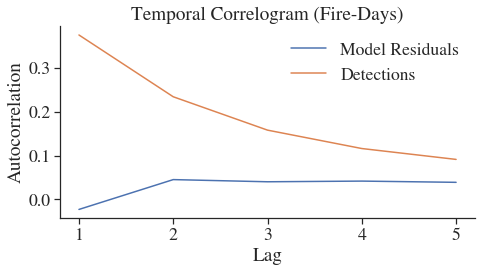

In [1012]:
set_font((FIG_REG_WIDTH,FIG_REG_WIDTH/FIG_REG_ASPECT_RATIO))

rows = []
rows.append(correlogram(residual_runs, 'Model Residuals'))
#correlogram(residual_no_ar_runs, 'Model Residuals (No AR)')
#correlogram(residual_persist_runs, 'Persistence')
rows.append(correlogram(detection_runs, 'Detections'))

print(tabulate(zip(*rows), headers=['Model Residuals', 'Detections']))


plt.title('Temporal Correlogram (Fire-Days)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.tight_layout()

sb.despine()
plt.legend()
plt.savefig('temporal_correl.pdf')

In [969]:
print('Number of Runs > length 5: ', len([x for x in residual_runs if len(x) > 5]))
print('Longest Run: ', np.max([len(x) for x in residual_runs]))

Number of Runs > length 5:  275
Longest Run:  26


In [1007]:
_ = plt.hist(residuals[fire_day==1], bins=75, range=(np.min(residuals), 100), label='Model Residuals')
# _ = plt.hist(residuals_no_ar[fire_day==1],range=(np.min(residuals), 100), bins=75, label='Model Residuals (No AR)')
plt.legend()
sb.despine()
plt.tight_layout()
plt.title('Residual Distribution')

Text(0.5, 1.0, 'Residual Distribution')

In [681]:
print(temp_correl(residual_runs))
pairs = [create_pairs(x, 1) for x in residual_runs]
pairs = np.array(sum(pairs, []))

0.350688504648


In [915]:
np.shape(residual_runs)

(2832,)

# Spatial

In [686]:
weather_proc_region_src = os.path.join('/extra/graffc0/fire_prediction/data', 'interim/gfs/weather_proc/4/weather_proc_gfs_4_alaska_2007-2016.pkl')
weather_proc_region = load.load_pickle(weather_proc_region_src)


In [1013]:
y.shape

(33, 55, 1100)

In [1042]:
set_font((FIG_REG_WIDTH*2,FIG_REG_WIDTH*2/FIG_REG_ASPECT_RATIO))
mp = vmap.make_map(weather_proc_region.bounding_box, (0, .5, 0, .5))
mp.shadedrelief()

y_nan = np.copy(y[:,:,:550])
y_nan[active[:,:,:550]==0] = np.nan

values = np.nanmean(y_nan, axis=2)
lats, lons = weather_proc_region.bounding_box.make_grid(inclusive_lon=True)

cs = mp.pcolormesh(lons, lats , values, latlon=True, alpha=.9)
plt.colorbar()

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


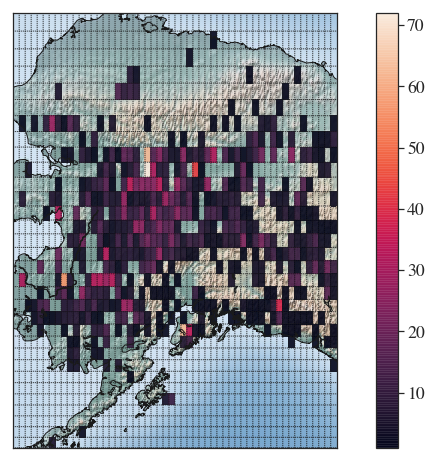

In [1043]:
set_font((FIG_REG_WIDTH*2,FIG_REG_WIDTH*2/FIG_REG_ASPECT_RATIO))
mp = vmap.make_map(weather_proc_region.bounding_box, (0, .5, 0, .5))
mp.shadedrelief()

y_nan = np.copy(y[:,:,550:])
y_nan[active[:,:,550:]==0] = np.nan

values = np.nanmean(y_nan, axis=2)
lats, lons = weather_proc_region.bounding_box.make_grid(inclusive_lon=True)

cs = mp.pcolormesh(lons, lats , values, latlon=True, alpha=.9)
plt.colorbar()

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


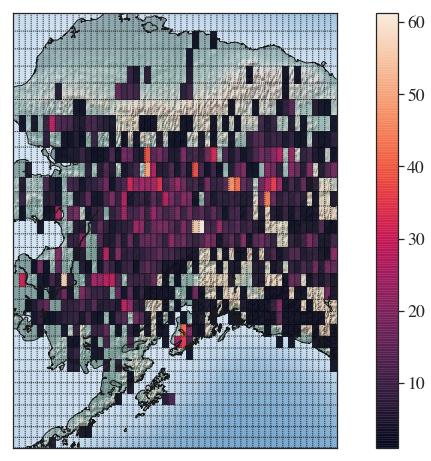

In [1044]:
set_font((FIG_REG_WIDTH*2,FIG_REG_WIDTH*2/FIG_REG_ASPECT_RATIO))
mp = vmap.make_map(weather_proc_region.bounding_box, (0, .5, 0, .5))
mp.shadedrelief()

y_nan = np.copy(y)
y_nan[active==0] = np.nan

values = np.nanmean(y_nan, axis=2)
lats, lons = weather_proc_region.bounding_box.make_grid(inclusive_lon=True)

cs = mp.pcolormesh(lons, lats , values, latlon=True, alpha=.9)
plt.colorbar()

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: Mean of empty slice


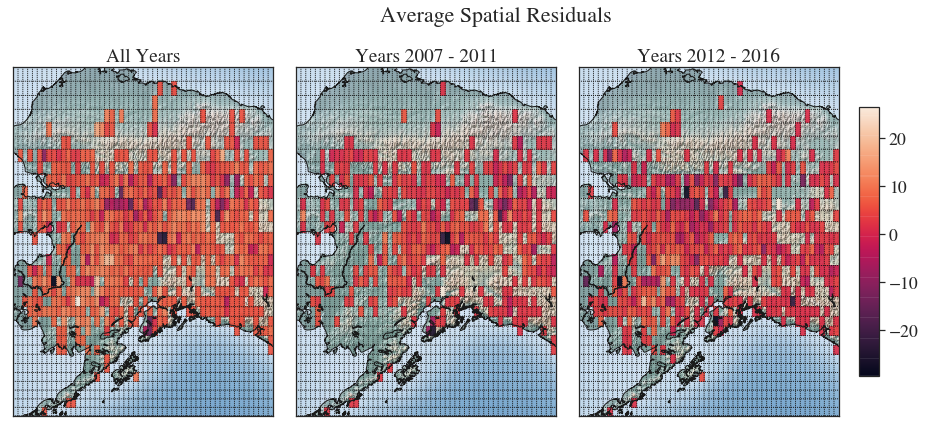

In [1209]:
set_font((FIG_REG_WIDTH*2,FIG_REG_WIDTH*1.7/FIG_REG_ASPECT_RATIO))


fig = plt.figure()
fig.suptitle('Average Spatial Residuals', fontsize=22)

ax = fig.add_subplot(131)
plt.title('All Years')

mp = vmap.make_map(weather_proc_region.bounding_box, (0, .5, 0, .5))
mp.shadedrelief()

residuals_nan = np.copy(residuals)
residuals_nan[fire_day==0] = np.nan

values = np.nanmean(residuals_nan, axis=2)
lats, lons = weather_proc_region.bounding_box.make_grid(inclusive_lon=True)

cs = mp.pcolormesh(lons, lats , values, latlon=True, alpha=.9)


ax = fig.add_subplot(132)
plt.title('Years 2007 - 2011')

mp = vmap.make_map(weather_proc_region.bounding_box, (0, .5, 0, .5))
mp.shadedrelief()

residuals_nan = np.copy(residuals[:,:,:550])
residuals_nan[fire_day[:,:,:550]==0] = np.nan

values = np.nanmean(residuals_nan, axis=2)
lats, lons = weather_proc_region.bounding_box.make_grid(inclusive_lon=True)

cs = mp.pcolormesh(lons, lats , values, latlon=True, alpha=.9)


ax = fig.add_subplot(133)
plt.title('Years 2012 - 2016')


mp = vmap.make_map(weather_proc_region.bounding_box, (0, .5, 0, .5))
mp.shadedrelief()

residuals_nan = np.copy(residuals[:,:,550:])
residuals_nan[fire_day[:,:,550:]==0] = np.nan

values = np.nanmean(residuals_nan, axis=2)
lats, lons = weather_proc_region.bounding_box.make_grid(inclusive_lon=True)

cs = mp.pcolormesh(lons, lats , values, latlon=True, alpha=.9)

plt.tight_layout()

fig.subplots_adjust(right=0.84)
cbar_ax = fig.add_axes([0.86, .225, 0.02, .55])
_ = fig.colorbar(cs, cax=cbar_ax)

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


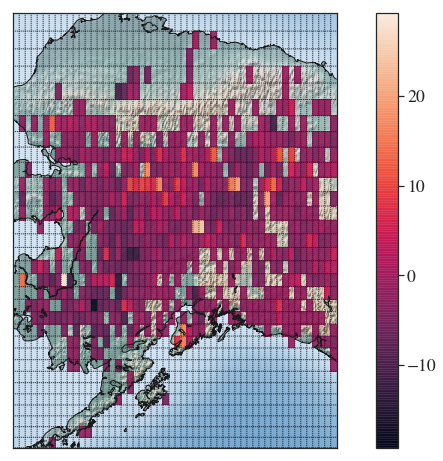

In [1067]:
set_font((FIG_REG_WIDTH*2,FIG_REG_WIDTH*2/FIG_REG_ASPECT_RATIO))
mp = vmap.make_map(weather_proc_region.bounding_box, (0, .5, 0, .5))
mp.shadedrelief()

residuals_nan = np.copy(residuals)
residuals_nan[fire_day==0] = np.nan

values = np.nanmean(residuals_nan, axis=2)
lats, lons = weather_proc_region.bounding_box.make_grid(inclusive_lon=True)

cs = mp.pcolormesh(lons, lats , values, latlon=True, alpha=.9)
plt.colorbar()

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


0.700038017832


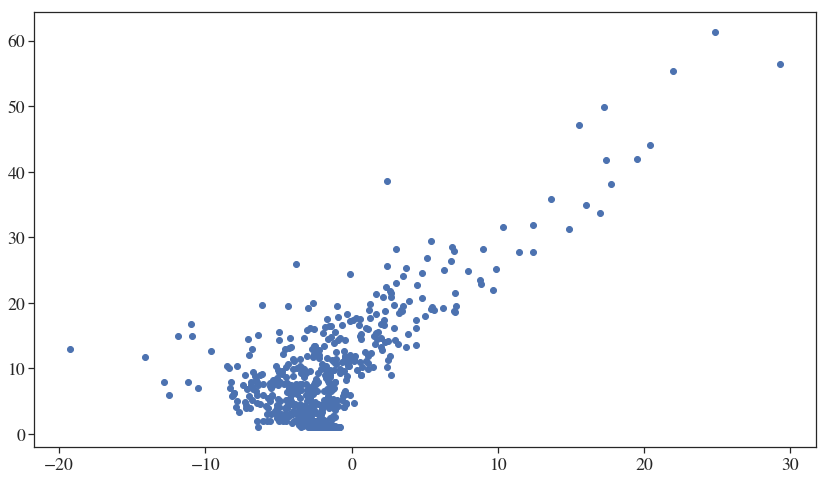

In [1070]:
y_nan = np.copy(y)
y_nan[active==0] = np.nan

values_y = np.nanmean(y_nan, axis=2)

residuals_nan = np.copy(residuals)
residuals_nan[fire_day==0] = np.nan

values_residual = np.nanmean(residuals_nan, axis=2)

b = np.array([values_y.flatten(), values_residual.flatten()])

c = np.array([(b[0,i],b[1,i]) for i in range(b.shape[1]) if not np.isnan(b[0, i]) and not np.isnan(b[1, i])])

plt.scatter(c[:,1], c[:,0])
print(correl(c))

In [1038]:
residuals_nan = np.copy(residuals[:,:,:550])
residuals_nan[fire_day[:,:,:550]==0] = np.nan

values_0 = np.nanmean(residuals_nan, axis=2)

residuals_nan = np.copy(residuals[:,:,550:])
residuals_nan[fire_day[:,:,550:]==0] = np.nan


values_1 = np.nanmean(residuals_nan, axis=2)

b = np.array([values_0.flatten(), values_1.flatten()])

c = [(b[0,i],b[1,i]) for i in range(b.shape[1]) if not np.isnan(b[0, i]) and not np.isnan(b[1, i])]
correl(np.array(c))

(33, 55)


/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


0.014047742054856987

In [712]:
neighbor_inds = np.array([[ 0, 29],[ 0, 30]])
residuals[tuple([neighbor_inds.T])].shape

(2, 2, 55, 1100)

In [1034]:
c

[(-0.97551527889804879, -1.4639902371752813),
 (-1.3747773907832488, -0.85989471518320981),
 (1.2935230557041519, -8.026456338762328),
 (-0.16368851368651019, -1.4418822635260504),
 (-0.032431931993620378, 4.8126117785963283),
 (-1.7143957959085112, 1.3593506067552308),
 (-2.730139104419655, -1.172820020573448),
 (-1.1184479530821041, -5.5049846082123048),
 (-1.1363029198730126, -1.7923101241174091),
 (-1.6073672355926591, -1.5739524233150477),
 (0.077074571185984972, 0.8938564946587283),
 (-1.1158957645193122, -1.1710365340903899),
 (-1.2433446494543614, -2.8755607776458456),
 (-2.4580459479717036, -3.1184040185115234),
 (-2.40706204219696, 1.7795806844545825),
 (2.692480622338564, -5.9397857051351064),
 (-3.248013659388858, -0.82789420666742686),
 (-0.3904468120142412, -3.4709813240907623),
 (-5.7803780532270643, -1.369542243069116),
 (-1.619927286158968, -1.4662789328630939),
 (-2.8027990097092528, -4.5630876490571577),
 (-0.22062755954564528, -1.6769952880534473),
 (-1.301254624512

In [739]:
def num_active_neighbors(X, neighborhood_size=3):
    non_zeros = []
    for p in itertools.product(range(X.shape[0]), range(X.shape[1]), range(X.shape[2])):
        if X[p] != 0:
            neighbor_inds = get_neighbors(p[:-1], neighborhood_size, shape=X.shape[:-1])
            neighbor_inds = np.array([tuple(inds) + (p[2],) for inds in neighbor_inds])
            neighbors = X[tuple(neighbor_inds.T)]
            non_zeros.append(np.sum(neighbors!=0))
            
    return non_zeros

In [762]:
def create_neighbor_pairs(X, active, neighborhood_size=3):
    pairs = []
    for p in itertools.product(range(X.shape[0]), range(X.shape[1]), range(X.shape[2])):
        if active[p]:
            val = X[p]
            
            neighbor_inds = get_neighbors(p[:-1], neighborhood_size, shape=X.shape[:-1])
            neighbor_inds = np.array([tuple(inds) + (p[2],) for inds in neighbor_inds])
            neighbors = X[tuple(neighbor_inds.T)]
            
            non_zero_neighbors = [n for n in neighbors if n !=0]
            
            if len(non_zero_neighbors) > 0:
                neighbor_mean = np.mean(non_zero_neighbors)
                
                pairs.append((val, neighbor_mean))
    return pairs

def correl_non_zero_neighbors(X, active, neighborhood_size=3):
    pairs = create_neighbor_pairs(X, active, neighborhood_size)
    pairs = np.array(pairs)
    return correl(pairs)

In [788]:
def spatial_correlgram(X, title=None, neighborhood_sizes=[3,5,7]):
    ys = []
    for ns in neighborhood_sizes:
        ys.append(morans(X, ns))
        
    plt.plot(neighborhood_sizes, ys, label=title)
    

In [972]:
num_active = np.array(num_active_neighbors(residuals))

In [973]:
np.sum(num_active!=0)/len(num_active)

0.69215271481817264

In [974]:
correl_non_zero_neighbors(residuals, fire_day, 7)

(array([[-0.88260983, -0.23446725],
        [-5.57453137, -1.62922643],
        [-7.19871427,  6.99559981],
        ..., 
        [-3.72043196,  1.        ],
        [-2.9601964 , -9.84072017],
        [-3.83947595,  5.        ]]), 0.48611658109129968)

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


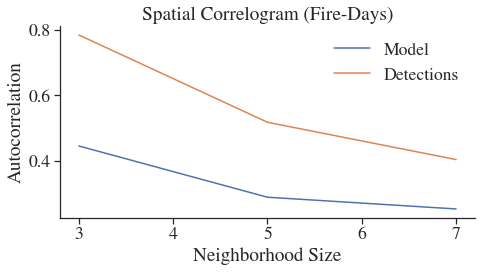

In [976]:
set_font((FIG_REG_WIDTH,FIG_REG_WIDTH/FIG_REG_ASPECT_RATIO))

residuals_nan = np.copy(residuals)
residuals_nan[fire_day==0] = np.nan
spatial_correlgram(np.nanmean(residuals_nan, axis=2), 'Model')

y_nan = np.copy(y)
y_nan[active==0] = np.nan
spatial_correlgram(np.nanmean(y_nan, axis=2), 'Detections')


plt.title('Spatial Correlogram (Fire-Days)')
plt.xlabel('Neighborhood Size')
plt.ylabel('Autocorrelation')
plt.tight_layout()

sb.despine()
plt.legend()
plt.savefig('spatial_correl.pdf')

In [792]:
%%capture
with open(os.path.join(EXP_DIR, '238373242110579441784596300227070522608.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_active = pickle.load(fin)

In [814]:
hurdle_poisson_vpd_ar_active['params']

{'model_structure': 'grid',
 'separated_ignitions': 'active_only',
 'active_model_type': 'hurdle_p',
 'ignition_model_type': 'hurdle_p',
 'covariates': ('vpd',),
 'ignition_covariates_exclude': ('num_det',),
 'active_covariates_exclude': (),
 'memory_type': 'none',
 'memory_covariates': (),
 'memory_log_covariates': ('num_det',),
 'memory_length': 2,
 'decay_method': 'fixed',
 'decay_values': <FrozenOrderedDict OrderedDict([('default', 0.5), ('num_det', 0.25), ('temperature', 0.25), ('humidity', 0.5), ('rain', 0.25)])>,
 'forecast_method': 'separate',
 'active_check_days': 1,
 'regularization_weight': None,
 'log_correction_type': 'max',
 'log_correction_constant': 0.5,
 'log_covariates': ('num_det',),
 'fill_method': 'interpolate',
 'resolution': '4',
 'region': 'alaska',
 'forecast_horizon': 5,
 'exposure': False,
 'normalize_params': False,
 'filter_mask': 'no_ocean',
 'large_fire_split_percent': 0.9}

In [802]:
import statsmodels

In [799]:
y_season = y.reshape((33, 55, 10, 110))

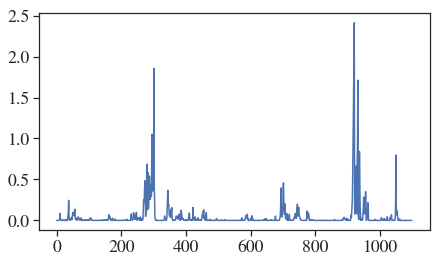

In [801]:
plt.plot(np.mean(y, axis=(0,1)))

In [805]:
decomp = statsmodels.tsa.seasonal.seasonal_decompose(np.mean(y, axis=(0,1)), freq=110)

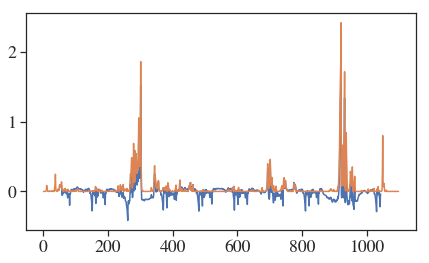

In [813]:
plt.plot(decomp.resid)
plt.plot(np.mean(y, axis=(0,1)))

In [847]:
exposure = {'train': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.6443623404145409, 1.4929036770010304, 1.6160922606852988, 1.6817527227547706, 1.7042072580270295, 1.7268557836045759]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.070380602886159216, 0.064028745015554486, 0.071025064656461898, 0.072274272854706292, 0.071932909946301082, 0.072642021957772293])}, 'test': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.6549386184374029, 1.4981530933465654, 1.6262794682170534, 1.6954744402263515, 1.7141444177577656, 1.7406416726392793]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.070301475730477375, 0.063886810817076908, 0.070843437984549631, 0.072233369147797766, 0.071860897239422142, 0.072682863463540429]), 'root_mean_squared_error_active': (['Avg.', 1, 2, 3, 4, 5], [19.019449509842353, 20.416057150825768, 20.335216221181508, 18.983635069707137, 17.769746078429197, 17.592593029068162], [0.0035582268970698722, 0.0035582268970698722, 0.0035582268970698722, 0.0035582268970698722, 0.0035582268970698722]), 'mean_absolute_error_active': (['Avg.', 1, 2, 3, 4, 5], [9.0050680886427994, 10.956582514096839, 10.277573338436437, 8.8174671223889103, 7.6902651353060021, 7.283452332985811], [0.0035582268970698722, 0.0035582268970698722, 0.0035582268970698722, 0.0035582268970698722, 0.0035582268970698722]), 'root_mean_squared_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [0.94016946633932519, 0.44690006737878807, 0.78629817490852627, 1.0542090367764132, 1.1812601457974905, 1.2321799068354082], [0.99644177310293014, 0.99644177310293014, 0.99644177310293014, 0.99644177310293014, 0.99644177310293014]), 'mean_absolute_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [0.026233499686436686, 0.010161954410257622, 0.020501895980410287, 0.029100205380496222, 0.034285471937126034, 0.037117970723893244], [0.99644177310293014, 0.99644177310293014, 0.99644177310293014, 0.99644177310293014, 0.99644177310293014]), 'root_mean_squared_error_active_target': (['Avg.', 1, 2, 3, 4, 5], [28.677733078515267, 25.217453825537586, 28.274192577886939, 29.259189994892434, 29.672980560804405, 30.964848433454979], [0.002144252441773103, 0.001683946907087403, 0.0013719008264462809, 0.0011735537190082645, 0.0010543451039318808]), 'mean_absolute_error_active_target': (['Avg.', 1, 2, 3, 4, 5], [15.202898611586104, 13.986086428479521, 15.309283123470239, 15.4644846183739, 15.394238327770353, 15.86040055983651], [0.002144252441773103, 0.001683946907087403, 0.0013719008264462809, 0.0011735537190082645, 0.0010543451039318808]), 'root_mean_squared_error_ignition_target': (['Avg.', 1, 2, 3, 4, 5], [17.211338423019992, 10.100806291788164, 15.422826051112981, 19.130815259994069, 20.525824437088293, 20.876420075116449], [0.0014144753318307036, 0.0018767843726521412, 0.0021923365890308038, 0.0023906836964688203, 0.0025138993238166792]), 'mean_absolute_error_ignition_target': (['Avg.', 1, 2, 3, 4, 5], [8.7225820041576441, 5.1850799289520424, 7.8790797217763506, 9.5722463934050843, 10.338652110014696, 10.637851866640048], [0.0014144753318307036, 0.0018767843726521412, 0.0021923365890308038, 0.0023906836964688203, 0.0025138993238166792]), 'root_mean_squared_error_zero_zero_target': (['Avg.', 1, 2, 3, 4, 5], [0.012594361354034586, 0.0061333343873582963, 0.0091459759173247307, 0.011839481693020478, 0.013975702699417069, 0.021877312073052355], [0.99502729777109944, 0.99456498873027799, 0.9942494365138993, 0.99405108940646125, 0.9939278737791134]), 'mean_absolute_error_zero_zero_target': (['Avg.', 1, 2, 3, 4, 5], [3.9196592961051105e-05, 1.3932515076722877e-05, 2.509466264408519e-05, 3.6961125961425136e-05, 4.8830066485623381e-05, 7.1164594637398944e-05], [0.99502729777109944, 0.99456498873027799, 0.9942494365138993, 0.99405108940646125, 0.9939278737791134]), 'root_mean_squared_error_extinction_target': (['Avg.', 1, 2, 3, 4, 5], [7.2613312037091875, 9.1413691815560565, 8.1282578270074115, 6.9715829190591787, 6.1045883776204297, 5.9608577133028593], [0.0014139744552967694, 0.0018742799899824692, 0.0021863260706235913, 0.0023846731780616079, 0.0025038817931379914]), 'mean_absolute_error_extinction_target': (['Avg.', 1, 2, 3, 4, 5], [4.8577216761042994, 6.3488082591011503, 5.7472822622246467, 4.6369433746270516, 3.8909788398010607, 3.6645956447675867], [0.0014139744552967694, 0.0018742799899824692, 0.0021863260706235913, 0.0023846731780616079, 0.0025038817931379914])}}
nonexposure = {'train': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.6444769083964008, 1.4929067385155639, 1.6160617406740647, 1.6819331116219767, 1.7045126195644793, 1.7269703316059197]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.070381872409420468, 0.063981615425519417, 0.070995326874270362, 0.072324388090596631, 0.071965590890911146, 0.072642440765804714])}, 'test': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.6545419717038405, 1.4983486013016587, 1.625907935324086, 1.6950245754832574, 1.7134583164356212, 1.7399704299745808]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.070267517059820178, 0.063825327854161285, 0.070788528148190047, 0.072242222190032609, 0.071852863813355136, 0.072628643293361758]), 'root_mean_squared_error_active': (['Avg.', 1, 2, 3, 4, 5], [19.011781516888959, 20.418980245418084, 20.329162037929351, 18.975448033082625, 17.756258647493429, 17.579058620521309], [0.0035582268970698722, 0.0035582268970698722, 0.0035582268970698722, 0.0035582268970698722, 0.0035582268970698722]), 'mean_absolute_error_active': (['Avg.', 1, 2, 3, 4, 5], [8.9981490214637851, 10.944055382070033, 10.266385478628969, 8.8192709266243448, 7.6886283275759144, 7.2724049924196628], [0.0035582268970698722, 0.0035582268970698722, 0.0035582268970698722, 0.0035582268970698722, 0.0035582268970698722]), 'root_mean_squared_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [0.94016946633932519, 0.44690006737878807, 0.78629817490852627, 1.0542090367764132, 1.1812601457974905, 1.2321799068354082], [0.99644177310293014, 0.99644177310293014, 0.99644177310293014, 0.99644177310293014, 0.99644177310293014]), 'mean_absolute_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [0.026233499686436686, 0.010161954410257622, 0.020501895980410287, 0.029100205380496222, 0.034285471937126034, 0.037117970723893244], [0.99644177310293014, 0.99644177310293014, 0.99644177310293014, 0.99644177310293014, 0.99644177310293014]), 'root_mean_squared_error_active_target': (['Avg.', 1, 2, 3, 4, 5], [28.659073258080507, 25.228483046368932, 28.260726441387604, 29.223535587742088, 29.635336928560253, 30.947284286343653], [0.002144252441773103, 0.001683946907087403, 0.0013719008264462809, 0.0011735537190082645, 0.0010543451039318808]), 'mean_absolute_error_active_target': (['Avg.', 1, 2, 3, 4, 5], [15.193700156274218, 13.979334818542519, 15.291397965227167, 15.455668027842776, 15.39370367151861, 15.848396298240017], [0.002144252441773103, 0.001683946907087403, 0.0013719008264462809, 0.0011735537190082645, 0.0010543451039318808]), 'root_mean_squared_error_ignition_target': (['Avg.', 1, 2, 3, 4, 5], [17.211338423019992, 10.100806291788164, 15.422826051112981, 19.130815259994069, 20.525824437088293, 20.876420075116449], [0.0014144753318307036, 0.0018767843726521412, 0.0021923365890308038, 0.0023906836964688203, 0.0025138993238166792]), 'mean_absolute_error_ignition_target': (['Avg.', 1, 2, 3, 4, 5], [8.7225820041576441, 5.1850799289520424, 7.8790797217763506, 9.5722463934050843, 10.338652110014696, 10.637851866640048], [0.0014144753318307036, 0.0018767843726521412, 0.0021923365890308038, 0.0023906836964688203, 0.0025138993238166792]), 'root_mean_squared_error_zero_zero_target': (['Avg.', 1, 2, 3, 4, 5], [0.012594361354034586, 0.0061333343873582963, 0.0091459759173247307, 0.011839481693020478, 0.013975702699417069, 0.021877312073052355], [0.99502729777109944, 0.99456498873027799, 0.9942494365138993, 0.99405108940646125, 0.9939278737791134]), 'mean_absolute_error_zero_zero_target': (['Avg.', 1, 2, 3, 4, 5], [3.9196592961051105e-05, 1.3932515076722877e-05, 2.509466264408519e-05, 3.6961125961425136e-05, 4.8830066485623381e-05, 7.1164594637398944e-05], [0.99502729777109944, 0.99456498873027799, 0.9942494365138993, 0.99405108940646125, 0.9939278737791134]), 'root_mean_squared_error_extinction_target': (['Avg.', 1, 2, 3, 4, 5], [7.2721690982637526, 9.1114933149715167, 8.1416319430771011, 7.0290945322560194, 6.1360869537460747, 5.9425387472680518], [0.0014139744552967694, 0.0018742799899824692, 0.0021863260706235913, 0.0023846731780616079, 0.0025038817931379914]), 'mean_absolute_error_extinction_target': (['Avg.', 1, 2, 3, 4, 5], [4.8515596587941179, 6.3274967509036353, 5.7421243033124538, 4.6454266877638899, 3.888798495780978, 3.6539520562096315], [0.0014139744552967694, 0.0018742799899824692, 0.0021863260706235913, 0.0023846731780616079, 0.0025038817931379914])}}
mlp = {'train': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.6587101411445613, 1.5027287681880048, 1.6320526717898594, 1.6919347965937328, 1.7225868599520859, 1.744247609199123]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.072127611025394431, 0.064236470538323001, 0.072743750322538617, 0.074127187915095621, 0.07445926507088281, 0.075071381280132118])}, 'test': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.6734551534194799, 1.5109806394643248, 1.6452924716298021, 1.7115185739657717, 1.7413933404920123, 1.7580907415454885]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.07224069660911886, 0.064113062320635489, 0.072946119415173649, 0.074397222012224498, 0.074750392498611429, 0.074996686798949219]), 'root_mean_squared_error_active': (['Avg.', 1, 2, 3, 4, 5], [19.354248333151453, 20.607767603157111, 20.644484434458757, 19.274745522404213, 18.30160860662604, 17.94263549911113], [0.0035582268970698722, 0.0035582268970698722, 0.0035582268970698722, 0.0035582268970698722, 0.0035582268970698722]), 'mean_absolute_error_active': (['Avg.', 1, 2, 3, 4, 5], [9.4001836592642238, 11.002681178213498, 10.705993938919086, 9.258351380951412, 8.2789987760773815, 7.7548930221597443], [0.0035582268970698722, 0.0035582268970698722, 0.0035582268970698722, 0.0035582268970698722, 0.0035582268970698722]), 'root_mean_squared_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [0.94016946633932519, 0.44690006737878807, 0.78629817490852627, 1.0542090367764132, 1.1812601457974905, 1.2321799068354082], [0.99644177310293014, 0.99644177310293014, 0.99644177310293014, 0.99644177310293014, 0.99644177310293014]), 'mean_absolute_error_ignition': (['Avg.', 1, 2, 3, 4, 5], [0.026233499686436686, 0.010161954410257622, 0.020501895980410287, 0.029100205380496222, 0.034285471937126034, 0.037117970723893244], [0.99644177310293014, 0.99644177310293014, 0.99644177310293014, 0.99644177310293014, 0.99644177310293014]), 'root_mean_squared_error_active_target': (['Avg.', 1, 2, 3, 4, 5], [29.135180589144976, 25.520916832089249, 28.523015784286947, 29.57267558758863, 30.447622584530972, 31.611672157229091], [0.002144252441773103, 0.001683946907087403, 0.0013719008264462809, 0.0011735537190082645, 0.0010543451039318808]), 'mean_absolute_error_active_target': (['Avg.', 1, 2, 3, 4, 5], [15.087683309446557, 13.907860344911876, 15.110410136620496, 15.385704185590621, 15.355619281024413, 15.678822599085379], [0.002144252441773103, 0.001683946907087403, 0.0013719008264462809, 0.0011735537190082645, 0.0010543451039318808]), 'root_mean_squared_error_ignition_target': (['Avg.', 1, 2, 3, 4, 5], [17.211338423019992, 10.100806291788164, 15.422826051112981, 19.130815259994069, 20.525824437088293, 20.876420075116449], [0.0014144753318307036, 0.0018767843726521412, 0.0021923365890308038, 0.0023906836964688203, 0.0025138993238166792]), 'mean_absolute_error_ignition_target': (['Avg.', 1, 2, 3, 4, 5], [8.7225820041576441, 5.1850799289520424, 7.8790797217763506, 9.5722463934050843, 10.338652110014696, 10.637851866640048], [0.0014144753318307036, 0.0018767843726521412, 0.0021923365890308038, 0.0023906836964688203, 0.0025138993238166792]), 'root_mean_squared_error_zero_zero_target': (['Avg.', 1, 2, 3, 4, 5], [0.012594361354034586, 0.0061333343873582963, 0.0091459759173247307, 0.011839481693020478, 0.013975702699417069, 0.021877312073052355], [0.99502729777109944, 0.99456498873027799, 0.9942494365138993, 0.99405108940646125, 0.9939278737791134]), 'mean_absolute_error_zero_zero_target': (['Avg.', 1, 2, 3, 4, 5], [3.9196592961051105e-05, 1.3932515076722877e-05, 2.509466264408519e-05, 3.6961125961425136e-05, 4.8830066485623381e-05, 7.1164594637398944e-05], [0.99502729777109944, 0.99456498873027799, 0.9942494365138993, 0.99405108940646125, 0.9939278737791134]), 'root_mean_squared_error_extinction_target': (['Avg.', 1, 2, 3, 4, 5], [7.5466197381555897, 8.9427407096045002, 8.7993701977163319, 7.4260151356394219, 6.5532338715115692, 6.0117387763061254], [0.0014139744552967694, 0.0018742799899824692, 0.0021863260706235913, 0.0023846731780616079, 0.0025038817931379914]), 'mean_absolute_error_extinction_target': (['Avg.', 1, 2, 3, 4, 5], [5.5859616874790792, 6.584000711451214, 6.7404855433995481, 5.4046615228786683, 4.7890973146816966, 4.4115633449842644], [0.0014139744552967694, 0.0018742799899824692, 0.0021863260706235913, 0.0023846731780616079, 0.0025038817931379914])}}

In [842]:
print(exposure)
print()
print(exposure['test']['root_mean_squared_error'])

{'train': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.6443623404145409, 1.4929036770010304, 1.6160922606852988, 1.6817527227547706, 1.7042072580270295, 1.726855783604576]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.07038060288615922, 0.06402874501555449, 0.0710250646564619, 0.07227427285470629, 0.07193290994630108, 0.0726420219577723])}, 'test': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.6549386184374029, 1.4981530933465654, 1.6262794682170534, 1.6954744402263515, 1.7141444177577656, 1.7406416726392793]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.07030147573047738, 0.06388681081707691, 0.07084343798454963, 0.07223336914779777, 0.07186089723942214, 0.07268286346354043]), 'root_mean_squared_error_active': (['Avg.', 1, 2, 3, 4, 5], [19.019449509842353, 20.416057150825768, 20.335216221181508, 18.983635069707137, 17.769746078429197, 17.592593029068162], [0.003558226897069872, 0.003558226897069872, 0.003558226897069872, 0.003558226897069872, 0.0

In [841]:
print(nonexposure)
print()
print(nonexposure['test']['root_mean_squared_error'])

{'train': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.6444769083964008, 1.4929067385155639, 1.6160617406740647, 1.6819331116219767, 1.7045126195644793, 1.7269703316059197]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.07038187240942047, 0.06398161542551942, 0.07099532687427036, 0.07232438809059663, 0.07196559089091115, 0.07264244076580471])}, 'test': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.6545419717038405, 1.4983486013016587, 1.625907935324086, 1.6950245754832574, 1.7134583164356212, 1.7399704299745808]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.07026751705982018, 0.06382532785416128, 0.07078852814819005, 0.07224222219003261, 0.07185286381335514, 0.07262864329336176]), 'root_mean_squared_error_active': (['Avg.', 1, 2, 3, 4, 5], [19.01178151688896, 20.418980245418084, 20.32916203792935, 18.975448033082625, 17.75625864749343, 17.57905862052131], [0.003558226897069872, 0.003558226897069872, 0.003558226897069872, 0.003558226897069872, 0.003

In [848]:
print(mlp)
print()
print(mlp['test']['root_mean_squared_error'])

{'train': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.6587101411445613, 1.5027287681880048, 1.6320526717898594, 1.6919347965937328, 1.722586859952086, 1.744247609199123]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.07212761102539443, 0.064236470538323, 0.07274375032253862, 0.07412718791509562, 0.07445926507088281, 0.07507138128013212])}, 'test': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5], [1.67345515341948, 1.5109806394643248, 1.645292471629802, 1.7115185739657717, 1.7413933404920123, 1.7580907415454885]), 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5], [0.07224069660911886, 0.06411306232063549, 0.07294611941517365, 0.0743972220122245, 0.07475039249861143, 0.07499668679894922]), 'root_mean_squared_error_active': (['Avg.', 1, 2, 3, 4, 5], [19.354248333151453, 20.60776760315711, 20.644484434458757, 19.274745522404213, 18.30160860662604, 17.94263549911113], [0.003558226897069872, 0.003558226897069872, 0.003558226897069872, 0.003558226897069872, 0.003558226

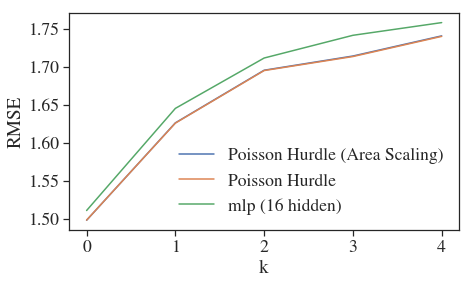

In [852]:
plt.plot([1.4981530933465654, 1.6262794682170534, 1.6954744402263515, 1.7141444177577656, 1.7406416726392793], label="Poisson Hurdle (Area Scaling)")
plt.plot([1.4983486013016587, 1.625907935324086, 1.6950245754832574, 1.7134583164356212, 1.7399704299745808], label="Poisson Hurdle")
plt.plot([1.5109806394643248, 1.645292471629802, 1.7115185739657717, 1.7413933404920123, 1.7580907415454885], label="mlp (16 hidden)")

plt.ylabel('RMSE')
plt.xlabel('k')
plt.legend()

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


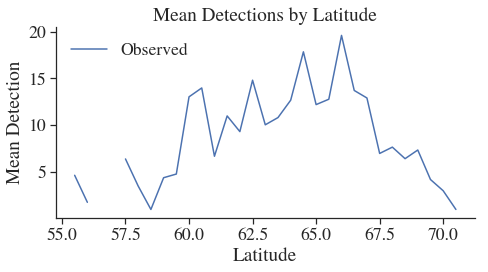

In [1155]:
set_font((FIG_REG_WIDTH,FIG_REG_WIDTH/FIG_REG_ASPECT_RATIO))
LATS = np.arange(71, 54.5, -.5)

y_nan = np.copy(y)
y_nan[active==0] = np.nan
avg_res = np.nanmean(y_nan, axis=(1,2))
plt.plot(LATS, avg_res, label="Observed")
plt.title('Mean Detections by Latitude')
plt.ylabel('Mean Detection')
plt.xlabel('Latitude')
plt.legend()
plt.tight_layout()
sb.despine()

In [1590]:
y_nan = np.copy(residuals_no_exp)
y_nan[fire_day==0] = np.nan
avg_res = np.nanmean(y_nan, axis=(1,2))

ind = np.isnan(avg_res) != True

fit = np.polyfit(LATS[ind], avg_res[ind], 1)

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


In [1600]:
fit

array([ 0.05071856,  0.01877688])

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


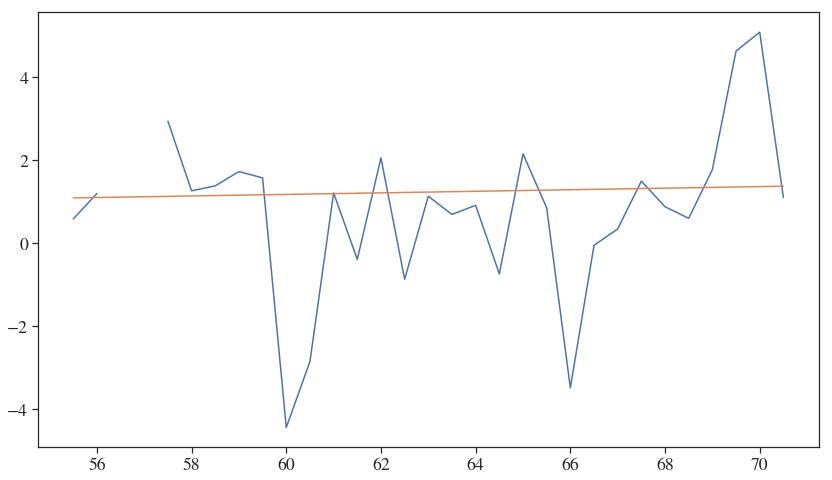

In [1599]:
y_nan = np.copy(residuals_no_exp)
y_nan[fire_day==0] = np.nan
avg_res = np.nanmean(y_nan, axis=(1,2))
plt.plot(LATS, avg_res, label='No Grid Area Scaling')

plt.plot(LATS[ind], fit[1] * LATS[ind] + fit[0])

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice


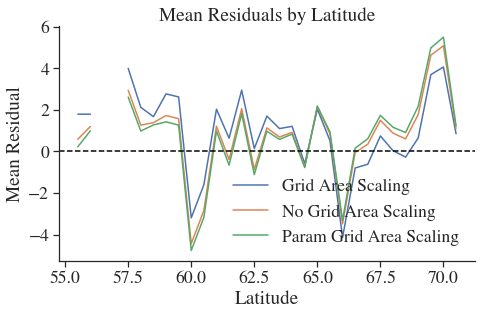

In [1534]:
set_font((FIG_REG_WIDTH,FIG_REG_WIDTH/FIG_REG_ASPECT_RATIO*1.15))

LATS = np.arange(71, 54.5, -.5)

y_nan = np.copy(residuals)
y_nan[fire_day==0] = np.nan
avg_res = np.nanmean(y_nan, axis=(1,2))
plt.plot(LATS, avg_res, label='Grid Area Scaling')

y_nan = np.copy(residuals_no_exp)
y_nan[fire_day==0] = np.nan
avg_res = np.nanmean(y_nan, axis=(1,2))
plt.plot(LATS, avg_res, label='No Grid Area Scaling')

y_nan = np.copy(residuals_param_exp)
y_nan[fire_day==0] = np.nan
avg_res = np.nanmean(y_nan, axis=(1,2))
plt.plot(LATS, avg_res, label='Param Grid Area Scaling')


plt.axhline(0, ls='--', c='black')

#y_nan = np.copy(residuals_param_exp)
#y_nan[fire_day==0] = np.nan
#avg_res = np.nanmean(y_nan, axis=(1,2))
#plt.plot(avg_res, label='Param Exposure')
plt.title('Mean Residuals by Latitude')
plt.ylabel('Mean Residual')
plt.xlabel('Latitude')
sb.despine()
plt.tight_layout()
plt.legend()

/home/graffc/miniconda3/envs/fire_pred/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Latitude')

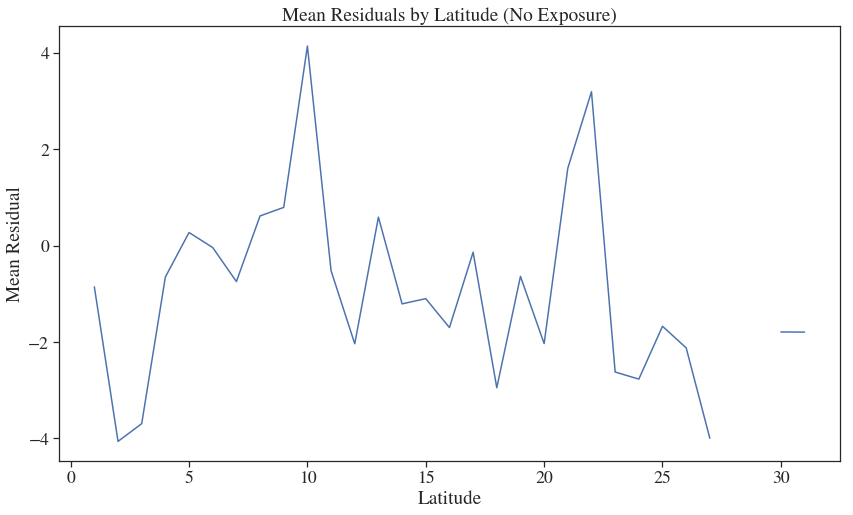

In [1080]:

plt.title('Mean Residuals by Latitude (No Exposure)')
plt.ylabel('Mean Residual')
plt.xlabel('Latitude')

### Instaneous Spatial Correl.

In [1512]:
def instant_spatial_pairs(X, active, neighbors_data=None, neighborhood_size=3, non_zero=True, past_offset=0):
    if neighbors_data is not None and non_zero:
        raise ValueError()
        
        
    pairs = []
    for p in itertools.product(range(X.shape[0]), range(X.shape[1]), range(X.shape[2])):
        val = X[p]
            
        if val == 0 or active[p] == 0:
            continue

        neighbor_inds = get_neighbors(p[:-1], neighborhood_size, shape=X.shape[:-1])
        
        if neighbors_data is not None:
            neighbors = neighbors_data[tuple(neighbor_inds.T)][:, p[-1] - past_offset]
        else:
            neighbors = X[tuple(neighbor_inds.T)][:, p[-1] - past_offset]
        
        if non_zero:
            neighbors_active = active[tuple(neighbor_inds.T)][:, p[-1] - past_offset]
            
            neighbors = [n for n,n_active in zip(neighbors,neighbors_active) if n_active != 0]
            
            if len(neighbors) == 0:
                continue
        
        pairs.append( (val, np.mean(neighbors)) )
        
    return np.array(pairs)

In [1466]:
spatial_pairs_detections = instant_spatial_pairs(y, active, non_zero=False)
spatial_pairs_detections_non_zero = instant_spatial_pairs(y, active)

In [1447]:
spatial_pairs = instant_spatial_pairs(residuals, fire_day, non_zero=False)
spatial_pairs_non_zero = instant_spatial_pairs(residuals, fire_day)

In [1460]:
spatial_pairs_past_1 = instant_spatial_pairs(residuals, fire_day, non_zero=False, past_offset=1)
spatial_pairs_non_zero_past_1 = instant_spatial_pairs(residuals, fire_day, past_offset=1)

In [1449]:
spatial_pairs_non_zero_neighbors = instant_spatial_pairs(residuals_neighbors, fire_day)

In [1467]:
print('All Detections', correl(spatial_pairs_detections))
print('All Non-zero Detections', correl(spatial_pairs_detections_non_zero))

print('All', correl(spatial_pairs))
print('Non-zero', correl(spatial_pairs_non_zero))
print('Non-zero Neighbors', correl(spatial_pairs_non_zero_neighbors))

All Detections 0.389904321314
All Non-zero Detections 0.31913100875
All 0.489500337545
Non-zero 0.499219473003
Non-zero Neighbors 0.499208965531


In [1461]:
print('All Past 1', correl(spatial_pairs_past_1))
print('Non-zero Past 1', correl(spatial_pairs_non_zero_past_1))

All Past 1 -0.0883219122152
Non-zero Past 1 -0.0958849543814


Text(0.5, 1.0, 'Model residuals (per cell/day) vs. avg. model residuals of neighborhood')

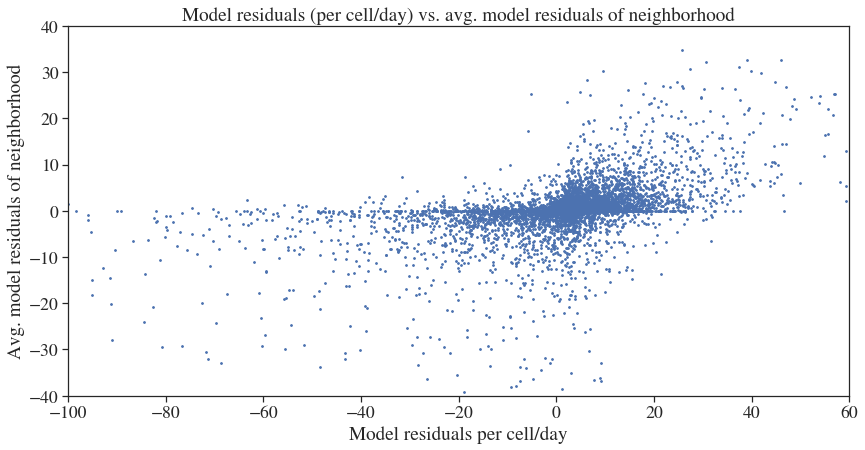

In [1456]:
_ = plt.scatter(spatial_pairs[:,0], spatial_pairs[:,1], s=3)

plt.ylim((-40,40))
plt.xlim((-100,60))

plt.xlabel('Model residuals per cell/day')
plt.ylabel('Avg. model residuals of neighborhood')
plt.title('Model residuals (per cell/day) vs. avg. model residuals of neighborhood')

Text(0.5, 1.0, 'Model residuals (per cell/day) vs. avg. model residuals of non-zero neighborhood')

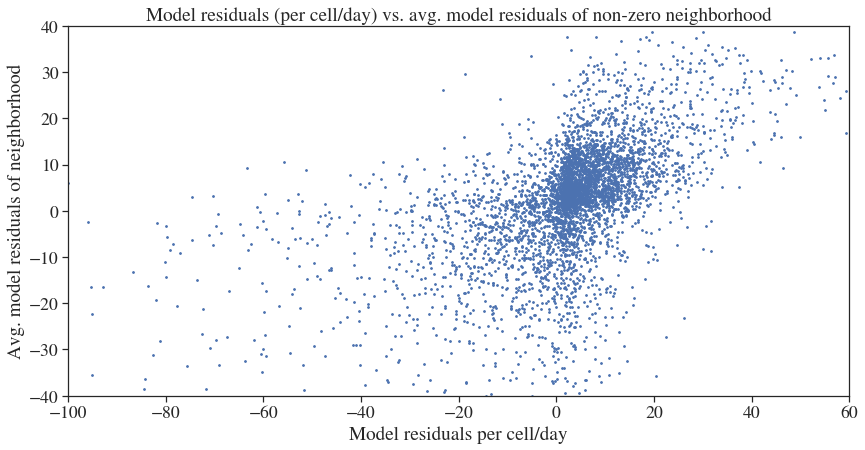

In [1457]:
_ = plt.scatter(spatial_pairs_non_zero[:,0], spatial_pairs_non_zero[:,1], s=3)

plt.ylim((-40,40))
plt.xlim((-100,60))

plt.xlabel('Model residuals per cell/day')
plt.ylabel('Avg. model residuals of neighborhood')
plt.title('Model residuals (per cell/day) vs. avg. model residuals of non-zero neighborhood')

Text(0.5, 1.0, 'Model residuals (per cell/day) vs. avg. model residuals of neighborhood past 1')

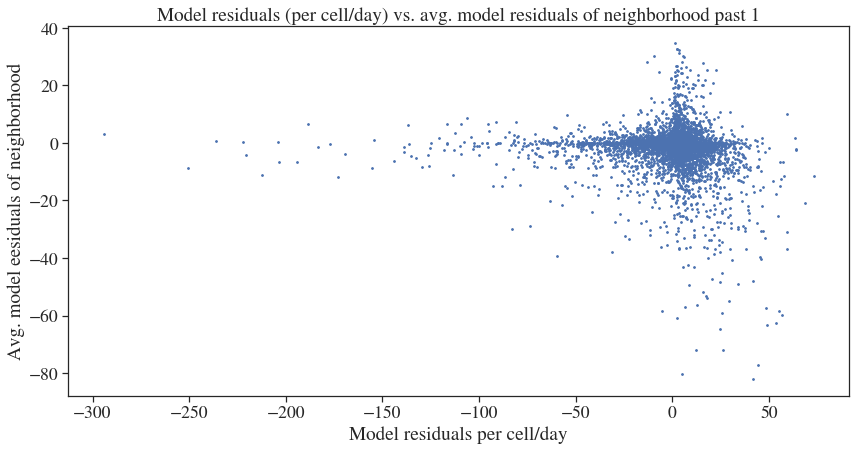

In [1463]:
_ = plt.scatter(spatial_pairs_past_1[:,0], spatial_pairs_past_1[:,1], s=3)
plt.xlabel('Model residuals per cell/day')
plt.ylabel('Avg. model eesiduals of neighborhood')
plt.title('Model residuals (per cell/day) vs. avg. model residuals of neighborhood past 1')

Text(0.5, 1.0, 'Detections (per cell/day) vs. detctions of neighborhood past 1')

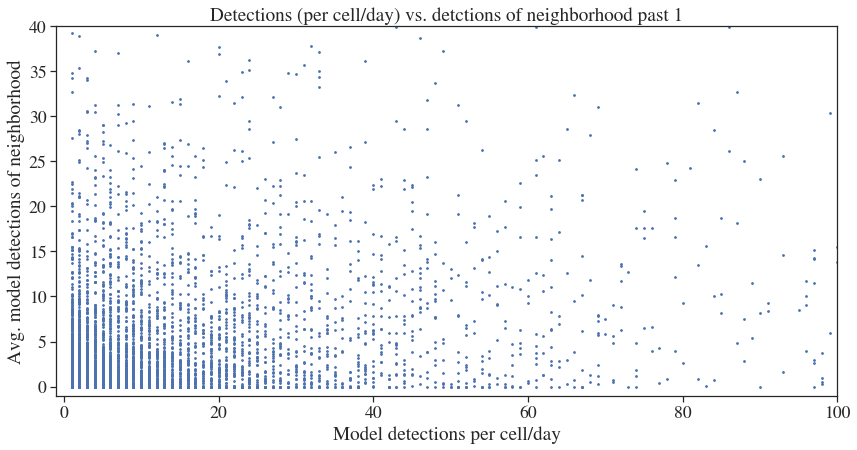

In [1470]:
_ = plt.scatter(spatial_pairs_detections[:,0], spatial_pairs_detections[:,1], s=3)

plt.ylim((-1,40))
plt.xlim((-1,100))

plt.xlabel('Model detections per cell/day')
plt.ylabel('Avg. model detections of neighborhood')
plt.title('Detections (per cell/day) vs. detctions of neighborhood past 1')

In [1507]:
def instant_spatial_pairs_v2(X, active, neighbors_data=None, neighborhood_size=3, non_zero=True, past_offset=0):
    if neighbors_data is not None and non_zero:
        raise ValueError()
        
    pairs = []
    for p in itertools.product(range(X.shape[0]), range(X.shape[1]), range(X.shape[2])):
        val = X[p]
            
        if val == 0 or active[p] == 0:
            continue

        neighbor_inds = get_neighbors(p[:-1], neighborhood_size, shape=X.shape[:-1])
        
        if neighbors_data is not None:
            neighbors = neighbors_data[tuple(neighbor_inds.T)][:, p[-1] - past_offset]
        else:
            neighbors = X[tuple(neighbor_inds.T)][:, p[-1] - past_offset]
        
        if non_zero:
            neighbors_active = active[tuple(neighbor_inds.T)][:, p[-1] - past_offset]
            
            neighbors = [n for n,n_active in zip(neighbors,neighbors_active) if n_active != 0]
            
            if len(neighbors) == 0:
                continue
        
        pairs += [(val, n) for n in neighbors]
        
    return np.array(pairs)

In [1480]:
spatial_pairs_detections_v2 = instant_spatial_pairs_v2(y, active, non_zero=False)

In [1475]:
spatial_pairs_v2 = instant_spatial_pairs_v2(residuals, fire_day, non_zero=False)
spatial_pairs_non_zero_v2 = instant_spatial_pairs_v2(residuals, fire_day)

In [1482]:
print('Detections', correl(spatial_pairs_detections_v2))
print('All', correl(spatial_pairs))
print('Non-zero', correl(spatial_pairs_non_zero))

Detections 0.205824203663
All 0.27028170771
Non-zero 0.416966776018


Text(0.5, 1.0, 'Detections (per cell/day) vs. detections of neighbor')

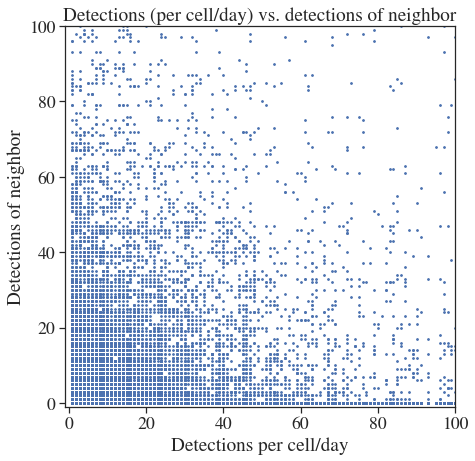

In [1499]:
set_font((FIG_REG_WIDTH,FIG_REG_WIDTH))

_ = plt.scatter(spatial_pairs_detections_v2[:,0], spatial_pairs_detections_v2[:,1], s=3)

plt.ylim((-1,100))
plt.xlim((-1,100))

plt.xlabel('Detections per cell/day')
plt.ylabel('Detections of neighbor')
plt.title('Detections (per cell/day) vs. detections of neighbor')

Text(0.5, 1.0, 'Model residuals (per cell/day) vs. residuals of neighbor')

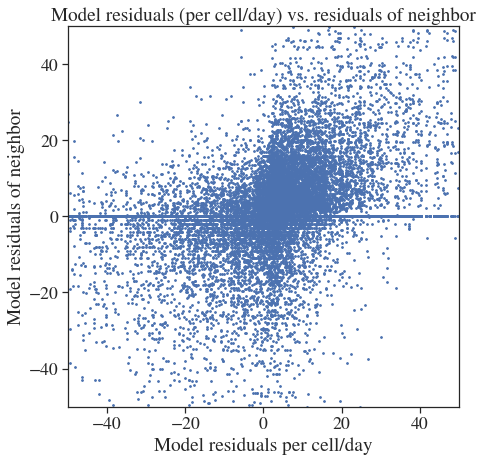

In [1497]:
set_font((FIG_REG_WIDTH,FIG_REG_WIDTH))

_ = plt.scatter(spatial_pairs_v2[:,0], spatial_pairs_v2[:,1], s=3)

plt.ylim((-50,50))
plt.xlim((-50,50))

plt.xlabel('Model residuals per cell/day')
plt.ylabel('Model residuals of neighbor')
plt.title('Model residuals (per cell/day) vs. residuals of neighbor')

Text(0.5, 1.0, 'Model residuals (per cell/day) vs. residuals of neighbor (non-zero)')

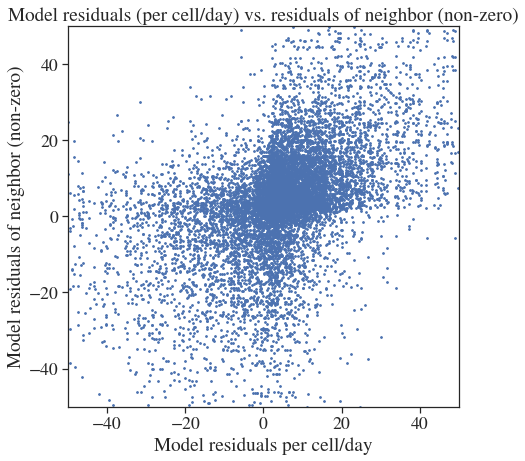

In [1495]:
set_font((FIG_REG_WIDTH,FIG_REG_WIDTH))

_ = plt.scatter(spatial_pairs_non_zero_v2[:,0], spatial_pairs_non_zero_v2[:,1], s=3)

plt.ylim((-50,50))
plt.xlim((-50,50))


plt.xlabel('Model residuals per cell/day')
plt.ylabel('Model residuals of neighbor (non-zero)')
plt.title('Model residuals (per cell/day) vs. residuals of neighbor (non-zero)')

In [1513]:
# === Using average
# r, r
rr_1 = instant_spatial_pairs(residuals, fire_day, non_zero=False, past_offset=-1)

# y, y
yy_1 = instant_spatial_pairs(y, active, non_zero=False, past_offset=-1)

# r, y
ry_1 = instant_spatial_pairs(residuals, fire_day, neighbors_data=y, non_zero=False, past_offset=-1)


# y, r
yr_1 = instant_spatial_pairs(y, active, neighbors_data=residuals, non_zero=False, past_offset=-1)


In [1509]:
# === Using each
# r, r
rr_1_v2 = instant_spatial_pairs_v2(residuals, fire_day, non_zero=False, past_offset=-1)

# y, y
yy_1_v2 = instant_spatial_pairs_v2(y, active, non_zero=False, past_offset=-1)

# r, y
ry_1_v2 = instant_spatial_pairs_v2(residuals, fire_day, neighbors_data=y, non_zero=False, past_offset=-1)


# y, r
yr_1_v2 = instant_spatial_pairs_v2(y, active, neighbors_data=residuals, non_zero=False, past_offset=-1)


In [1522]:
rows = []
rows.append( ['Averaging', correl(rr_1), correl(yy_1), correl(ry_1), correl(yr_1)] )
rows.append(['Separate', correl(rr_1_v2), correl(yy_1_v2), correl(ry_1_v2), correl(yr_1_v2)])

print(tabulate(rows, headers=['R -> R', 'Y -> Y', 'R -> Y', 'Y -> R'], floatfmt=".3f"))

             R -> R    Y -> Y    R -> Y    Y -> R
---------  --------  --------  --------  --------
Averaging    -0.095     0.156    -0.152     0.108
Separate     -0.053     0.085    -0.083     0.060
